# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {
        "q": city,
        "appid": weather_api_key
    }

    response = requests.get(url, params=city_url).json()

    if 'coord' in response:
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        one_call_url = f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={weather_api_key}"
        
    pass 
    one_call_url = f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(one_call_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting"
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | yulinshi
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | inhambane
Processing Record 6 of Set 1 | haiku-pauwela
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | kingston
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | crane
Processing Record 13 of Set 1 | jintur
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | irece
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | al jawf
Processing Record 18 of Set 1 | develi
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | devils lake
Processing Record 21 of Set 1 | whitehorse
Processing Record 22 of Set 1 | port-aux-francais
Process

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-21.25,96,100,4.63,RU,1734142758
1,yulinshi,38.2906,109.7494,-6.54,48,0,5.94,CN,1734142759
2,olonkinbyen,70.9221,-8.7187,-1.45,98,100,1.65,SJ,1734142762
3,puerto ayora,-0.7393,-90.3518,22.53,98,81,0.89,EC,1734142763
4,inhambane,-23.8650,35.3833,24.30,93,40,3.35,MZ,1734142765


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-21.25,96,100,4.63,RU,1734142758
1,yulinshi,38.2906,109.7494,-6.54,48,0,5.94,CN,1734142759
2,olonkinbyen,70.9221,-8.7187,-1.45,98,100,1.65,SJ,1734142762
3,puerto ayora,-0.7393,-90.3518,22.53,98,81,0.89,EC,1734142763
4,inhambane,-23.8650,35.3833,24.30,93,40,3.35,MZ,1734142765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

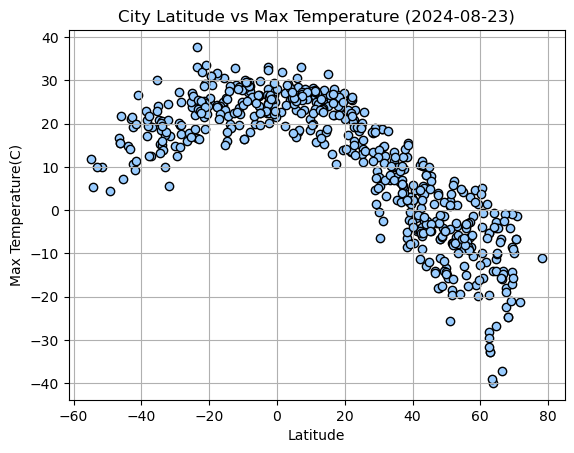

In [31]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat, max_temp, marker="o", facecolors="#99CCFF", edgecolors="black")
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature (2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

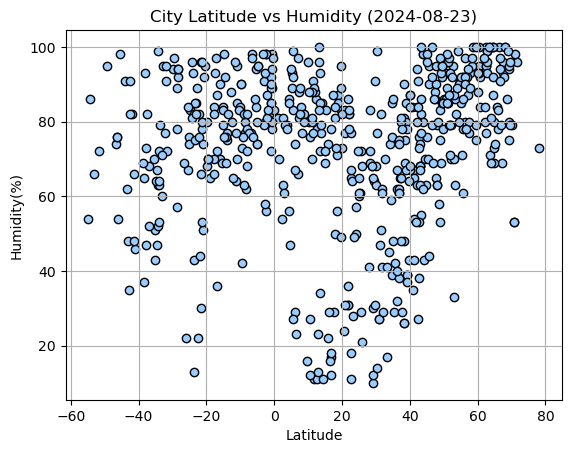

In [32]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity, marker="o", facecolors="#99CCFF", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

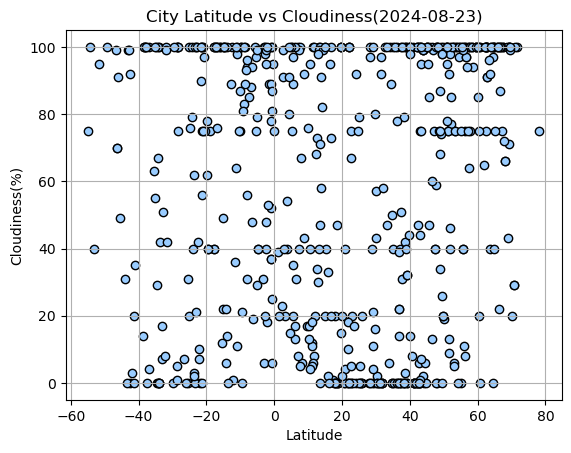

In [33]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lat, cloudiness, marker="o", facecolors="#99CCFF", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

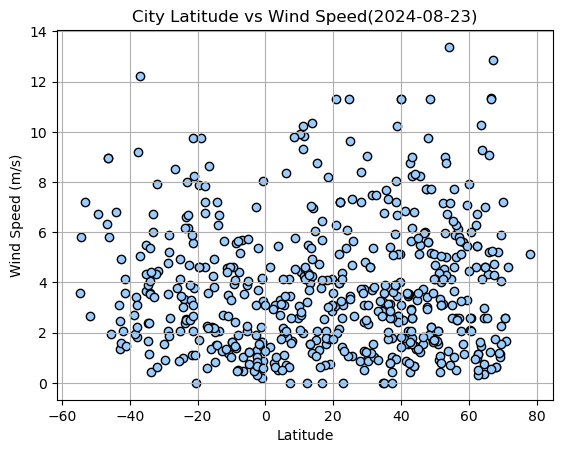

In [34]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat, wind_speed, marker="o", facecolors="#99CCFF", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
equation = ""
def plot_linear_regression(df, x_col, y_col, title, x_label, y_label):
    global equation

    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])

    r_squared = r_value**2
    print(f"The r^2-value is: {r_squared}")

    plt.scatter(df[x_col], df[y_col], facecolors="#99CCFF", edgecolors="black")

    plt.plot(df[x_col], slope * df[x_col] + intercept, color='r')

    equation = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-21.25,96,100,4.63,RU,1734142758
1,yulinshi,38.2906,109.7494,-6.54,48,0,5.94,CN,1734142759
2,olonkinbyen,70.9221,-8.7187,-1.45,98,100,1.65,SJ,1734142762
5,haiku-pauwela,20.9219,-156.3051,26.01,77,40,11.32,US,1734142767
8,georgetown,5.4112,100.3354,27.96,83,20,3.09,MY,1734142773


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,22.53,98,81,0.89,EC,1734142763
4,inhambane,-23.8650,35.3833,24.30,93,40,3.35,MZ,1734142765
6,adamstown,-25.0660,-130.1015,23.79,76,100,4.93,PN,1734142768
7,waitangi,-43.9535,-176.5597,14.89,91,31,6.79,NZ,1734142770
10,edinburgh of the seven seas,-37.0676,-12.3116,12.45,68,100,12.24,SH,1734142777


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7773229003846002


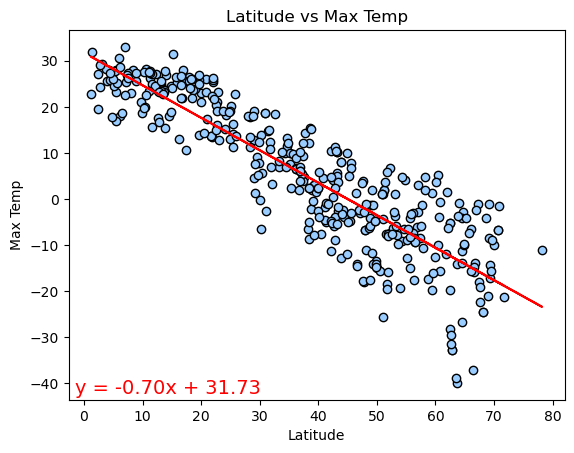

In [45]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude vs Max Temp', 'Latitude', 'Max Temp')
plt.text(.2, .03, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

The r^2-value is: 0.36472159582646685


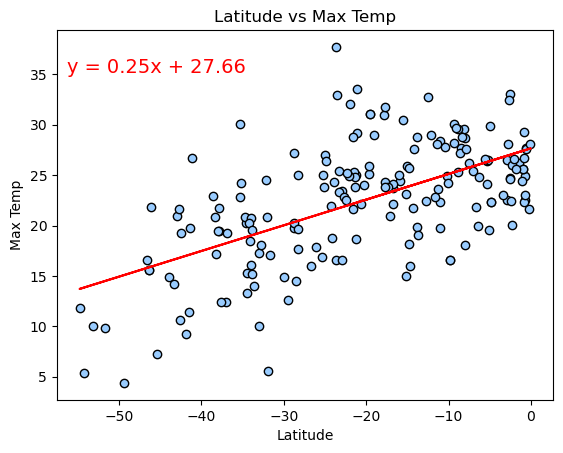

In [46]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude vs Max Temp', 'Latitude', 'Max Temp')
plt.text(.2, .9, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.13089126879053947


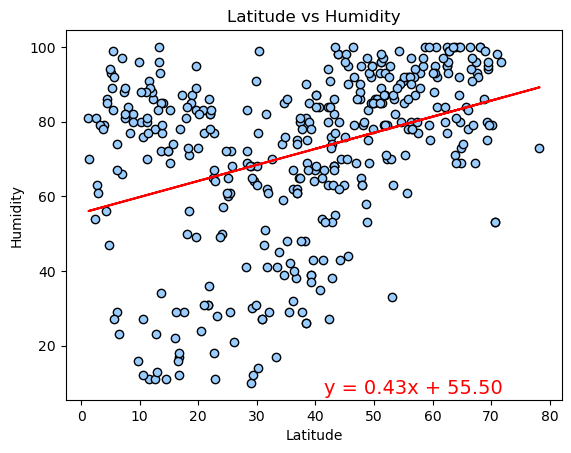

In [47]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity', 'Latitude vs Humidity', 'Latitude', 'Humidity')
plt.text(.7, .03, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

The r^2-value is: 0.0924125365938286


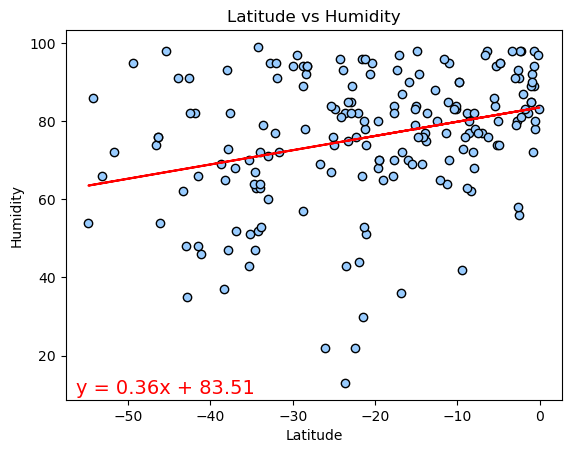

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity', 'Latitude vs Humidity', 'Latitude', 'Humidity')
plt.text(.2, .03, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.09717427310357998


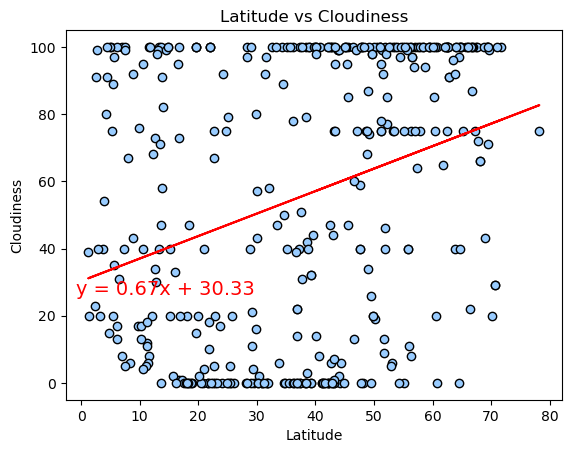

In [49]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude vs Cloudiness', 'Latitude', 'Cloudiness')
plt.text(.2, .3, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

The r^2-value is: 0.012168157971325843


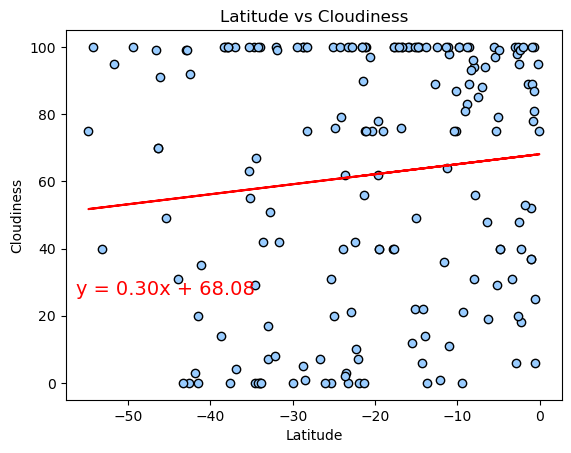

In [51]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude vs Cloudiness', 'Latitude', 'Cloudiness')
plt.text(.2, .3, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004105137498607859


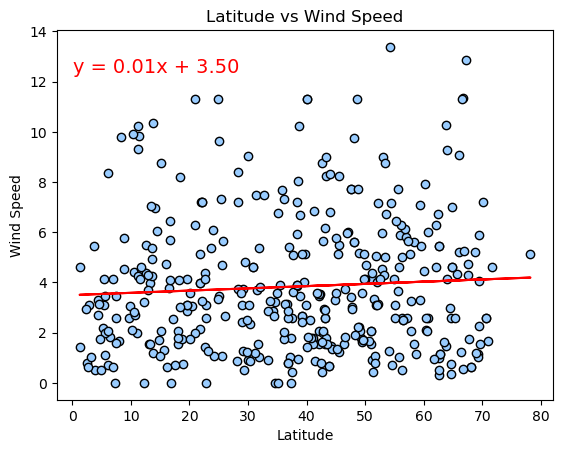

In [52]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude vs Wind Speed', 'Latitude', 'Wind Speed')
plt.text(.2, .9, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

The r^2-value is: 0.07619537735812104


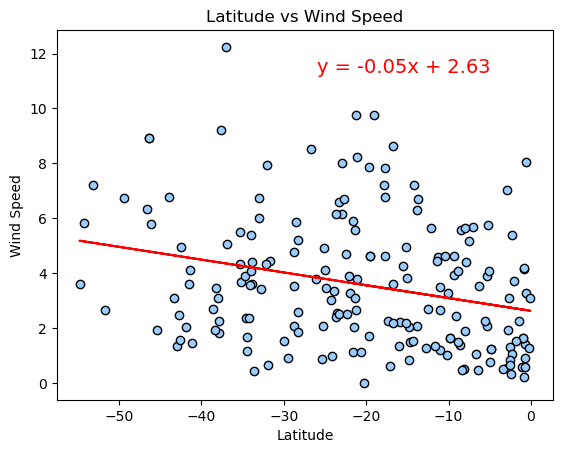

In [53]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude vs Wind Speed', 'Latitude', 'Wind Speed')
plt.text(.7, .9, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

**Discussion about the linear relationship:** 

The results of the data for both Nothern and Southern Hemisphere plots demonstrate that Latitude seems to have little effect on the Wind Speed. Where there is a trend that would suggest a lessening towards the equator, it's not enough to be suggest any real significances.